In [1]:
import warnings
warnings.filterwarnings('ignore')

# data and plotting
import pandas as pd
import numpy as np
from plotnine import *

# preprocessing
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.model_selection import train_test_split
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, plot_confusion_matrix, roc_auc_score, recall_score, precision_score

# models
from sklearn.svm import SVC


# Review
In the last lecture we learned about kernels and The Kernel Trick that allow us to use a linear classifier like SVCs on non-linearly separable data. 

Remember, a Kernel is a function that calculates the relationship (dot product) between two vectors *as if* they are in a higher dimensional space *without actually having to calculate that higher dimensional space*.

We talked about two main kernels:

## Polynomial Kernel

$$K(x,y) = (x*y + r)^d$$

The hyperparameters $r$ and $d$ can be chosen via hyperparameter tuning. $d$ controls the maximum dimensions of the space we're projecting our data to (e.g. when $d=2$ we're at most projecting to a 2D space). 

For example:

$$K(x,y) = (x*y + \frac{1}{2})^2$$
$$(x*y + \frac{1}{2})^2 = (x*y + \frac{1}{2})(x*y + \frac{1}{2})$$
$$ = xy + x^2y^2 + \frac{1}{4}$$

Notice that $xy + x^2y^2 + \frac{1}{4}$ is the same value we'd get if we took the dot product of the two vectors: $x' = (x,x^2, \frac{1}{2})$ and $y' = (y,y^2, \frac{1}{2})$. Thus, the kernel $K(x,y)$ calculates the same value as the dot product between two *transformed* points $x'$ and $y'$ which have 2 dimensions. The first dimension is the original variable, the second dimension is the variable squared (we ignore the 3rd dimension because it is the same for all data points, and thus does not give us any useful information).

BUT NOTICE, when we plug $x$ and $y$ into the kernel function $K(x,y)$, we NEVER actually had to calculate $x'$ and $y'$!! Which saves us a lot of time. This is true no matter the $r$ and $d$ values you use for the polynomial kernel.


## Radial Kernel (Radial Basis Function)

$$ K(x,y) = e^{-\gamma(x-y)^2}$$

This whole calculates-the-dot-product-without-calculating-the-transformed-data thing is especially useful when the transformation transforms the data into *infinite* dimensions like the Radial Kernel. 

We proved using Taylor Series Expansion that the radial kernel calculates the dot product of two data points *as if* they were projected into infinite dimensions. This causes the SVM to act like a weighted KNN model, and gives us a huge amount of flexibility with what our groups of data look like.

# SVC's in sklearn

We'll use this Pulsar Star Data from [Kaggle](https://www.kaggle.com/datasets/colearninglounge/predicting-pulsar-starintermediate?resource=download).

Download the data, then upload it using the upload button to Colab. 

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV

In [ ]:
star = pd.read_csv("/Users/chelseaparlett/Downloads/archive/pulsar_data_train.csv")
star.head()
star = star.dropna()

In [ ]:
predictors = [c for c in star.columns if c != "target_class"]

X = star[predictors]
y = star["target_class"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size = 0.2)

In [ ]:

z = make_column_transformer((StandardScaler(), predictors),
                            remainder= "passthrough")

svm = SVC(probability=True, kernel = "poly")

pipe = make_pipeline(z,svm)

# print(pipe.get_params().keys())

params = {"svc__C": [0.001,0.01, 0.1, 0.5, 1], 
          "svc__gamma": [0.001, 0.01,0.1, 0.5, 1,2,5,10,25,50], 
          "svc__kernel": ["linear", "rbf", "poly"],
          "svc__degree": [1,2,3,4,5,6,7,8,9,10]} 



# grid = GridSearchCV(pipe, params, scoring = "accuracy", cv = 5, refit = True)

# grid.fit(X_train, y_train)

# print(grid.best_estimator_.get_params()["svc__C"])
# print(grid.best_estimator_.get_params()["svc__gamma"])
# print(grid.best_estimator_.get_params()["svc__kernel"])
# print(grid.best_estimator_.get_params()["svc__degree"])

# Building an SVM with radial kernel

Let's look at that data we tried (and failed) to classify using a linear kernel last time.
- load in the data
- plot the data using a scatter plot
- do an 80/20 TTS
- zscore your data
- build an `SVC()` model with `kernel = "rbf"` and `C = 1`
- grab the train/test accuracy and ROC/AUC
- use the `plotSVM2D()` function I wrote for you to plot the decision boundary for your model for both train and test (just change the first two arguments, no need to refit the model)

In [2]:
# load data
d = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC393ParlettPelleriti/main/Data/svmcw.csv")
d.head()

,X1,X2,y
0,-1.203055,-1.309099,a
1,-1.486382,-0.159741,a
2,-0.832017,0.246909,a
3,-1.411230,1.565836,a
4,-1.154422,-0.144092,a


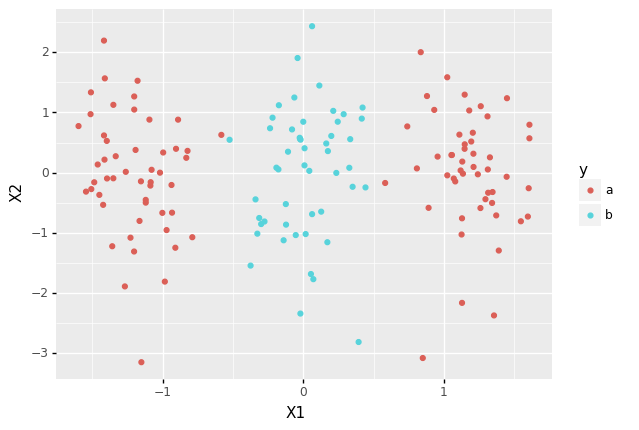

<ggplot: (8779610887241)>

In [3]:
# scatter plot
(ggplot(d, aes(x = "X1", y = "X2", color = "y")) + geom_point())

In [4]:
# Do your train test split, and z score
predictors = ["X1", "X2"]
X_train, X_test, y_train, y_test = train_test_split(d[predictors],
                                                     d["y"], test_size = 0.2)


z = StandardScaler()
X_train[predictors] = z.fit_transform(X_train[predictors])
X_test[predictors] = z.transform(X_test[predictors])

In [5]:
### YOUR CODE HERE ###

svm_cw = SVC(kernel="rbf", C = 1, probability=True)
svm_cw.fit(X_train, y_train)

print("Train Acc:", accuracy_score(y_train, svm_cw.predict(X_train)))
print("Test Acc :", accuracy_score(y_test, svm_cw.predict(X_test)))

print("Train AUC:", roc_auc_score(y_train, svm_cw.predict_proba(X_train)[:,1]))
print("Test AUC :", roc_auc_score(y_test, svm_cw.predict_proba(X_test)[:,1]))



Train Acc: 0.9833333333333333
Test Acc : 0.9666666666666667
Train AUC: 0.9993668882557771
Test AUC : 0.9952153110047848


In [6]:
def plotSVM2D(Xdf,y,model):
    x0_name = Xdf.columns[0]
    x1_name = Xdf.columns[1]
    #grab the range of features for each feature
    x0_range = np.linspace(min(Xdf[x0_name]) - np.std(Xdf[x0_name]),
                           max(Xdf[x0_name]) + np.std(Xdf[x0_name]), num = 100)
    x1_range = np.linspace(min(Xdf[x1_name]) - np.std(Xdf[x1_name]),
                           max(Xdf[x1_name]) + np.std(Xdf[x1_name]), num = 100)

    #get all possible points on graph
    x0 = np.repeat(x0_range,100)
    x1 = np.tile(x1_range,100)
    x_grid = pd.DataFrame({x0_name: x0,x1_name: x1})

    # bredict all background points
    p = model.predict(x_grid)
    x_grid["p"] = p #add to dataframe
    
    #build the plot
    bound = (ggplot(x_grid, aes(x = x0_name, y = x1_name, color = "factor(p)")) +
                 geom_point(alpha = 0.2, size = 0.2) + theme_minimal() +
                 scale_color_manual(name = "Class", values = ["#E69F00", "#0072B2"]) +
                 geom_point(data = Xdf, mapping = aes(x = x0_name, y = x1_name, color = "factor(y)"), size = 2))
    print(bound)

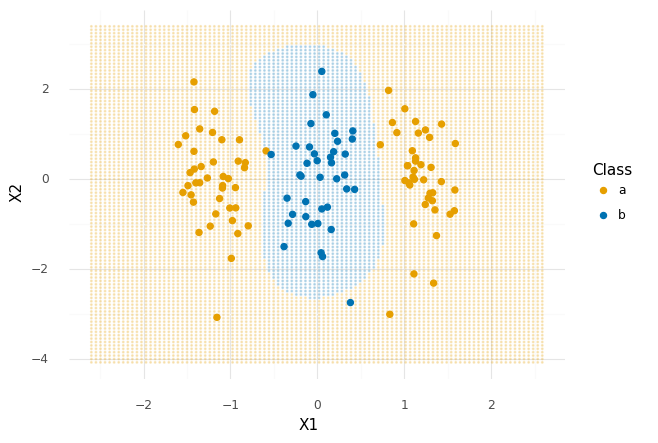

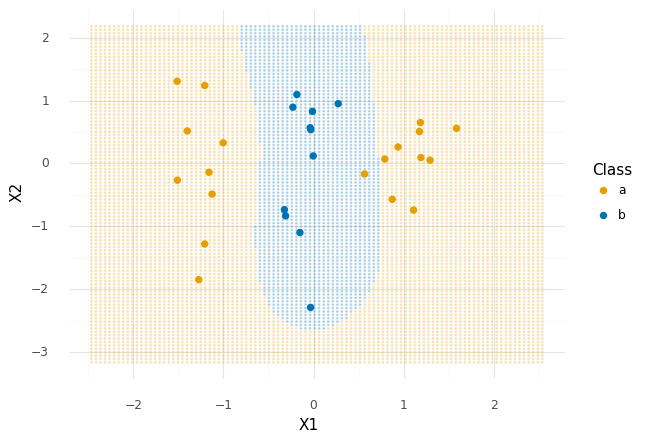

In [7]:
plotSVM2D(X_train,y_train,svm_cw)
plotSVM2D(X_test,y_test,svm_cw)

### Question
<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" width = "200"/>

How does the model do? How does it differ from the model you built using a linear kernel last class?

### Answer
The model can actually create reasonable decision boundaries now because the boundary doesnt have to be a straight line. The model is doing quite well on both training and testing with smooth boundaries that aren't underfit!

## The Gamma Hyperparameter
the Gamma parameter scales the amount of influence two data points have on each other. The bigger $\gamma$ is, the smaller the influence two data points have on each other. 

- Re-run your model above but set `gamma = 25`  

### Question
<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" width = "200"/>

How did changing `gamma` change the decision boundary? Did the boundary get smoother or more jagged? Do jagged boundaries more often lead to **overfitting** or **underfitting**

### Answer
The boundaries are more jagged, this will tend to lead to overfitting because it really only fits the exact data points in the test set. Data points close to the train set that aren't EXACTLY where the training data is may be misclassified.

In [8]:
### YOUR CODE HERE ###

svm_cw = SVC(kernel="rbf", C = 1, probability=True, gamma = 25)
svm_cw.fit(X_train, y_train)

print("Train Acc:", accuracy_score(y_train, svm_cw.predict(X_train)))
print("Test Acc :", accuracy_score(y_test, svm_cw.predict(X_test)))

print("Train AUC:", roc_auc_score(y_train, svm_cw.predict_proba(X_train)[:,1]))
print("Test AUC :", roc_auc_score(y_test, svm_cw.predict_proba(X_test)[:,1]))



Train Acc: 0.9916666666666667
Test Acc : 0.9333333333333333
Train AUC: 1.0
Test AUC : 0.9904306220095694


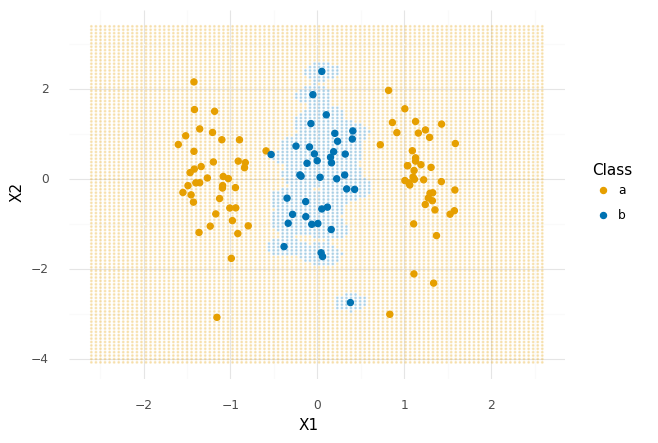

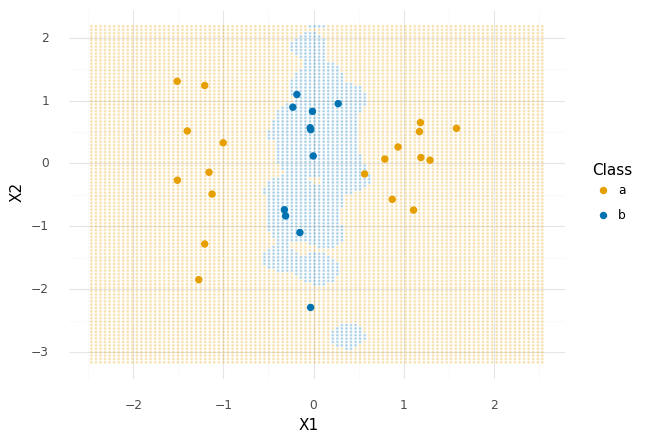

In [9]:
plotSVM2D(X_train,y_train,svm_cw)
plotSVM2D(X_test,y_test,svm_cw)

- Now re-run your model with `gamma = 0.1`.

### Question
<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" width = "200"/>

How is your model doing?

### Answer

The model isn't doing well, it looks underfit. Gamma impacts the influence of other data points on our data point, and with gamma this low, it looks like MOST of our data points are being classified as yellow, even though they should be blue.

In [10]:
### YOUR CODE HERE ###

svm_cw = SVC(kernel="rbf", C = 1, probability=True, gamma = 0.1)
svm_cw.fit(X_train, y_train)

print("Train Acc:", accuracy_score(y_train, svm_cw.predict(X_train)))
print("Test Acc :", accuracy_score(y_test, svm_cw.predict(X_test)))

print("Train AUC:", roc_auc_score(y_train, svm_cw.predict_proba(X_train)[:,1]))
print("Test AUC :", roc_auc_score(y_test, svm_cw.predict_proba(X_test)[:,1]))



Train Acc: 0.8666666666666667
Test Acc : 0.8666666666666667
Train AUC: 0.994935106046217
Test AUC : 0.9904306220095694


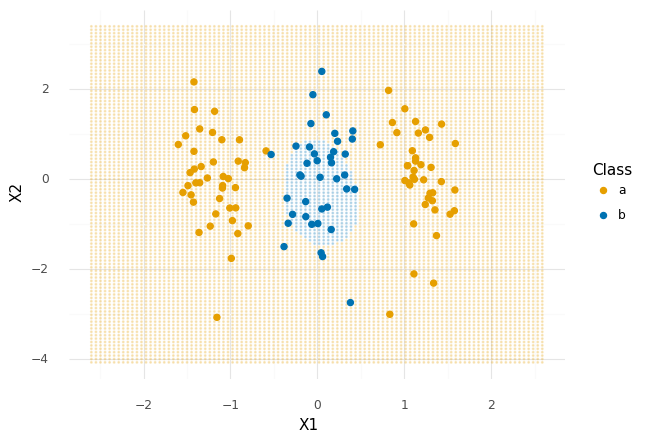

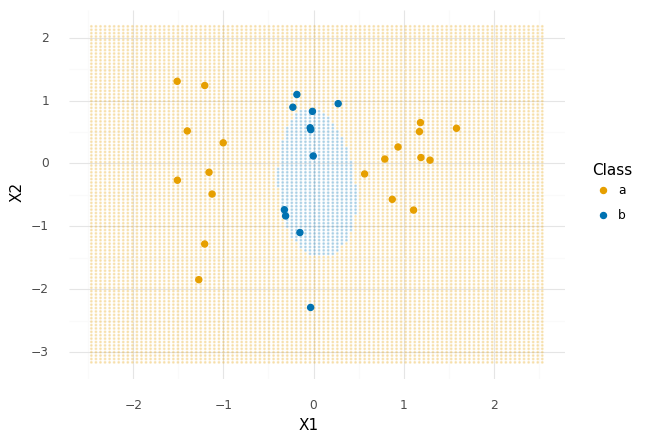

In [11]:
plotSVM2D(X_train,y_train,svm_cw)
plotSVM2D(X_test,y_test,svm_cw)

# Building an SVM with a polynomial kernel
Let's see if we can classify this data with a polynomial kernel.

- build an `SVC()` model with `kernel = "poly"`, `degree = 2`, `gamma = 1`, and `C = 1` (FYI for some odd reason sklearn calles the $r$ coefficient hyperparameter `gamma`)
- grab the train/test accuracy and ROC/AUC
- use the `plotSVM2D()` function I wrote for you to plot the decision boundary for your model for both train and test (just change the first two arguments, no need to refit the model)


### Question
<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" width = "200"/>

How does your model do? What does the decision boundary look like?

### Answer

The model still does well, it basically creates a band of blue in the middle.

In [12]:
### YOUR CODE HERE ###

svm_cw = SVC(kernel="poly", C = 1, probability=True, degree = 2, gamma = 10)
svm_cw.fit(X_train, y_train)

print("Train Acc:", accuracy_score(y_train, svm_cw.predict(X_train)))
print("Test Acc :", accuracy_score(y_test, svm_cw.predict(X_test)))

print("Train AUC:", roc_auc_score(y_train, svm_cw.predict_proba(X_train)[:,1]))
print("Test AUC :", roc_auc_score(y_test, svm_cw.predict_proba(X_test)[:,1]))



Train Acc: 1.0
Test Acc : 1.0
Train AUC: 1.0
Test AUC : 1.0


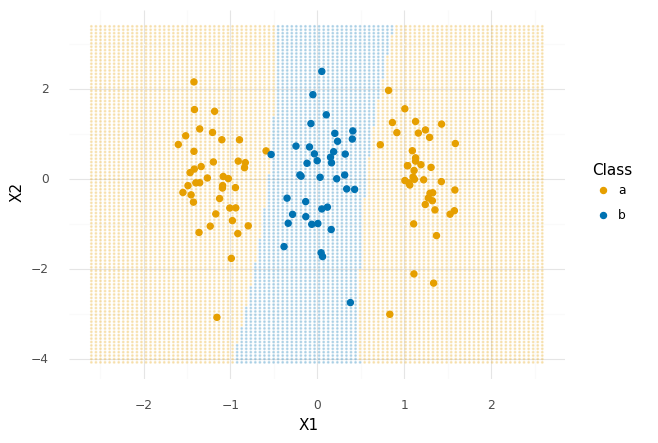

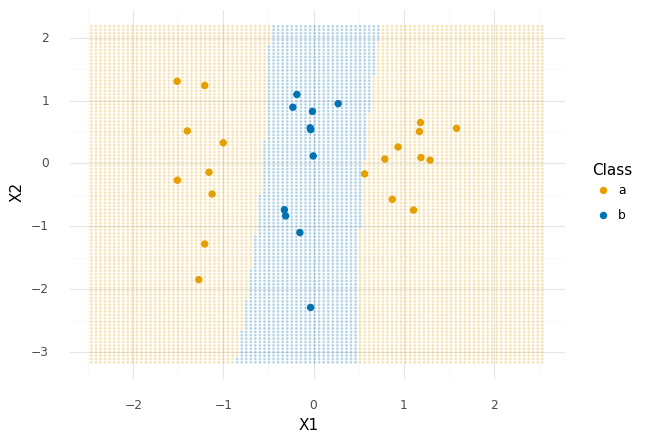

In [13]:
plotSVM2D(X_train,y_train,svm_cw)
plotSVM2D(X_test,y_test,svm_cw)

- Play around with the `C`, `degree` and `gamma` parameters.

### Question
<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" width = "200"/>

How do they change the performance and decision boundary of the model?

### Answer
Changing the degree gives the decision boundary more flexibility because it's projecting the data into more dimensions. `C` is the inverse regularization parameter, so it makes our margin wider, leading to (hopefully) more stability of the decision boundary because it is based on a greater number of support vectors. 

## Now with Messier Data

While the previous data was CLEARLY non-linear and needed the help of a kernel, it was still fairly separable. Let's try a messier dataset [here](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC393ParlettPelleriti/main/Data/svmcw2.csv).

- load the data
- plot the data with a scatterplot
- do a 80/20 TTS
- use a `rbf` kernel, and use GridSearch to chooose `C` (options should be `[0.001, 0.01, 0.1, 0.5, 1]`), and `gamma` (options should be `[0.001, 0.01, 0.1, 0.5, 1,2,5,10,25,50]`)
- (make sure you z score *appropriately*)
- print out the train/test accuracy and ROC/AUC.
- plot the decision boundary for the full model for train and test using `plotSVM2D()`

### Question
<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" width = "200"/>

What hyperparameter values did GridSearch choose? How did your model perform? What does the decision boundary look like?

### Answer

(Your values may be different) GridSearch chose 1 for oth `C` and `gamma`. The performance is good, however the model looks a little bit overfit. Thus we might want to reduce `C` and see if that helps. However because the data is so overlapping, we aren't surprised that the model does worse than the previous examples where the data was nearly separable.

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV


In [15]:
df2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC393ParlettPelleriti/main/Data/svmcw2.csv")
df2.head()

,X1,X2,y
0,-0.866022,-0.710659,a
1,-1.652263,-0.358436,a
2,-0.621188,-1.425054,a
3,-1.390115,0.484075,a
4,-1.206483,-0.168368,a


In [16]:
# Do your train test split, and z score
predictors = ["X1", "X2"]
X_train, X_test, y_train, y_test = train_test_split(df2[predictors],
                                                     df2["y"], test_size = 0.2)

In [17]:
### YOUR CODE HERE ###

z = make_column_transformer((StandardScaler(), predictors),
                            remainder= "passthrough")
svm = SVC(kernel="rbf", probability=True)

pipe = make_pipeline(z,svm)

# print(pipe.get_params().keys())

params = {"svc__C": [0.001, 0.01, 0.1, 0.5, 1], "svc__gamma": [0.001, 0.01, 0.1, 0.5, 1,2,5,10,25,50]}


grid = GridSearchCV(pipe, params, scoring = "accuracy", cv = 5, refit = True)

grid.fit(X_train, y_train)

print(grid.best_estimator_.get_params()["svc__C"])
print(grid.best_estimator_.get_params()["svc__gamma"])

print("Train Acc:", accuracy_score(y_train, grid.predict(X_train)))
print("Test Acc :", accuracy_score(y_test, grid.predict(X_test)))

print("Train AUC:", roc_auc_score(y_train, grid.predict_proba(X_train)[:,1]))
print("Test AUC :", roc_auc_score(y_test, grid.predict_proba(X_test)[:,1]))



1
1
Train Acc: 0.90625
Test Acc : 0.75
Train AUC: 0.9392092514455385
Test AUC : 0.7719298245614036


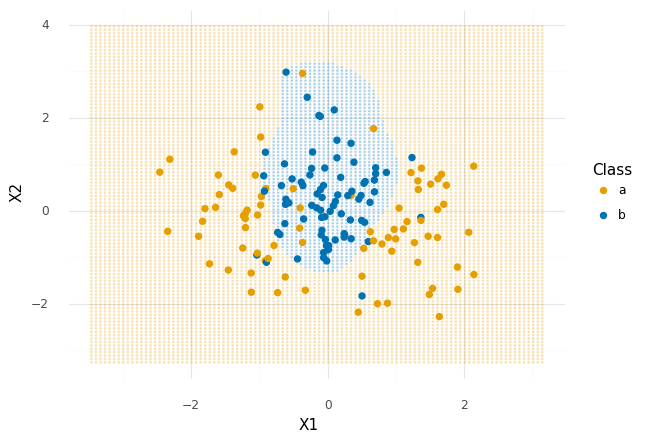

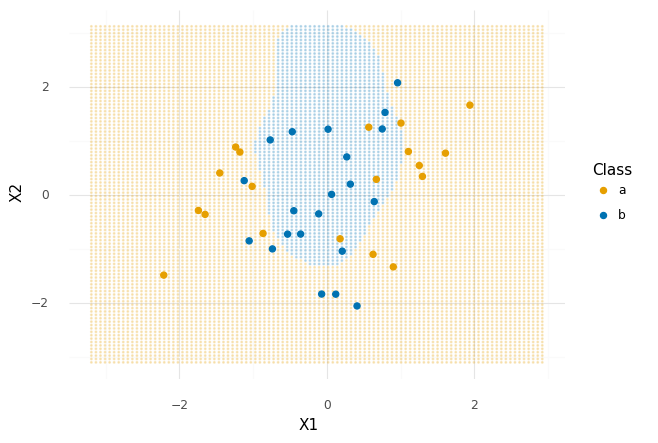

In [18]:
plotSVM2D(X_train,y_train,grid)
plotSVM2D(X_test,y_test,grid)